<a href="https://colab.research.google.com/github/AlbinB/Text-Analytics-NLP/blob/main/1_2_5_%2BNavigating%2BAmerican%2BHistory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture Notes

<h2>Measuring American History</h2>

**We show what a simple pipeline can tell us about 90 years of historical documents. **

We now have an automated process for getting strings to look like human language and to make sense for a machine as numbers. And we’ve seen how many things change when we do something slightly different along the way (pre-processing choices). Now I’m going to scale this up and show you why it matters.

Here we have all the congressional speeches from the US from 1931 to 2016. And we also have the leading paragraph of every article in The New York Times from that same period. This is 2.7 million political speeches and 6.7 million news articles. None of us could ever reasonably read through all these documents. But now we have a pipeline that can do it for us.

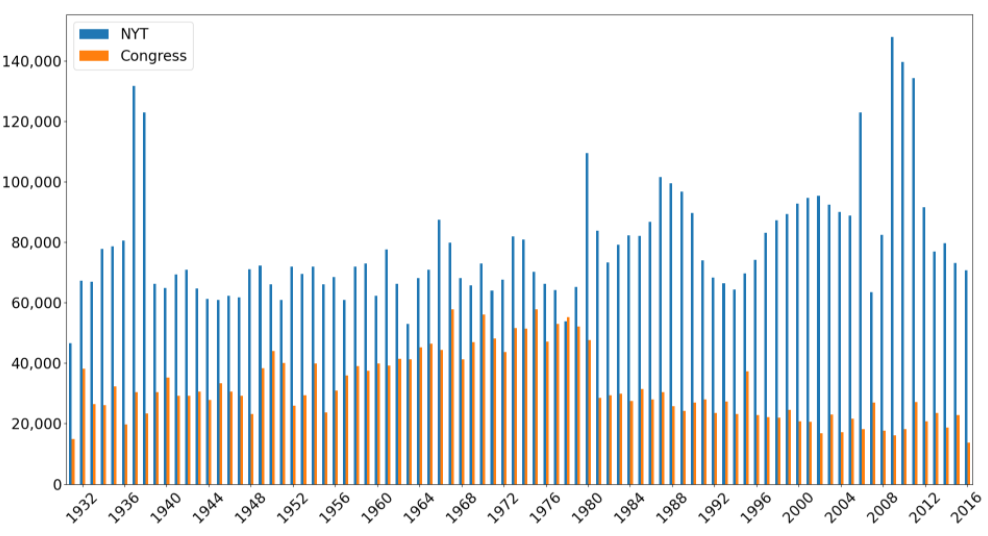

First, we build a vocabulary of 100k words that covers both The New York Times and the US Congress. This gives us a linguistic space that we can use to map out each individual article or speech. In Section 2.3 we used frequency to represent each word. But after what we learned in the last section, what do you think would happen if we use frequency alone to represent each document? Two things: first, function words will be so common that they drown out other content words. So if we care about topics, we have to remove those function words. Second, though, there will be topic words like bill and stocks and congress which are equally common across all time periods. And, because these words are equally common, they will make it hard to see what is changing. This is an important point because we want to learn what has changed over time.

In order to see what is happening on a monthly basis over this 90 year period, we need to find a way to reduce the importance of consistently common words. However, we don’t know what terms these will be. Unlike function words (a closed class), these are an open class of words. When we say a closed class, this means that English has a fixed list of function words. So we can just use a list of words to remove. But we can’t just make a list of content words. For example, in 1932 the word Vietnam wasn’t relevant to American politics. But in 1967 it was. That means we have to find content words. How do we highlight topics that are unique to each period?

What’s happening? What’s new? **The goal is to define each year by its hot topics. To achieve this, we weight each word frequency by the number of documents we see it in. For example, if “the” occurs in every article, then we want to reduce its overall score. But if “impeachment” is rare in most periods, we want to increase its overall score. The most common way to do this is using the tf-idf measure: term-frequency inverse document frequency.** Term frequency is what we’ve already been using: frequency alone, how many times a word occurs in a document. But the weighting term is the inverse document frequency. Weighting here just means that we make on adjustment to frequency so that what we measure isn’t just raw frequency alone.

Let’s take a look at what this means. Let’s say the word “the” occurs in 998 of 1,000 documents. But the word “justice” occurs in 14 of 1,000 documents. N is the number of documents in total (1,000). DF is the number of documents that contain a word like “the” or “justice”. We add 1 to both terms, in part to avoid having zero in either term. The core ratio is 1.002 or “the” and 66.73 for “justice”. Intuitively, this initial quantity is going to really highlight any occurrence of “justice”. That’s what we want because it is rare and thus distinguished this document from other documents. This is too strong of an effect, though, so we get the log and add 1. This smooths the measure and gives us a weight of 2.82 for “justice” and 1.008 for “the”. If don’t use the log, the weight for rare terms is too extreme. But if we don’t add 1 to smooth the result, the negative weight would make common words invisible. So this is a middle-ground.

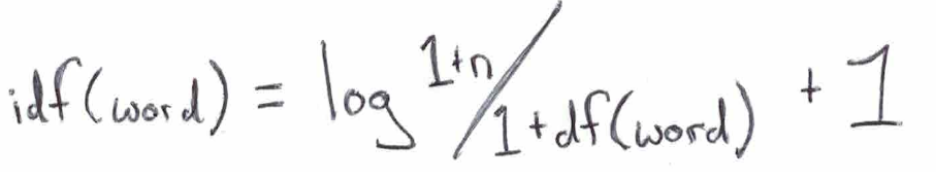

Let’s take a look at our historical documents. We use TF-IDF instead of frequency (TF) alone. This highlights words and topics that are less common. So, for example, if news articles from March 1972 use a cluster of words that are very infrequent in other periods, these words are brought to the surface. They are emphasized. This is exactly what we want so we can look through American history to see what is changing.

It's the same for congressional speeches. We aren’t focused on what stays the same: procedural motions, voting methods, forms of address. These are part of the institution of congress. What we are interested in, is exactly those topics which are changing. What are the political controversies of the day? That’s what TF-IDF gives us. Again, a wordcloud is the simplest possible representation. It doesn’t use machine learning at all. But it does give us an overview of American history.

Of course, political speeches are just one part of American history. They are focused on legislation. They are focused on policy issues. What about day-to-day concerns? Foreign affairs? Now we’re looking at a video of American history using TF-IDF wordclouds through the lens of The New York Times. There’s a different focus, a different perspective.


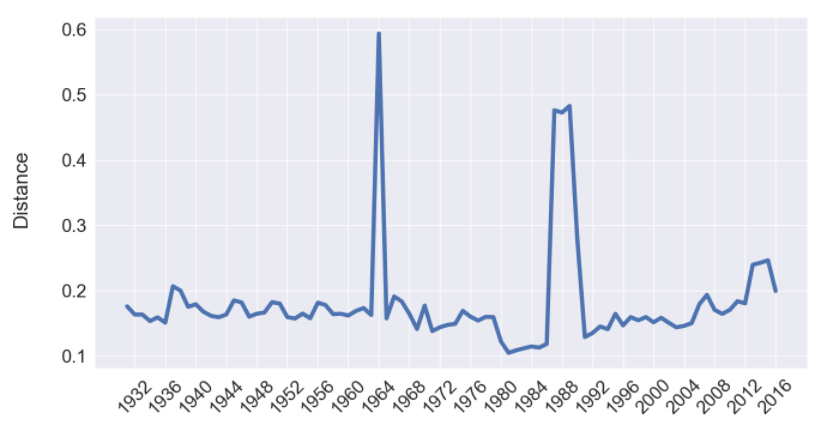

So we’re reinforcing the idea that we get different knowledge from different genres: news articles vs political speeches. Both are concerned with current affairs, but they aren’t exactly the same perspective on those affairs. What is the relationship between them? Remember that we’ve situated all these documents in linguistic space. We measure the distance between them (using cosine distance, which we’ll cover in more detail in a future section). Essentially, we use this distance measure to map out how far the news coverage is from the congressional speeches. If the news is talking about health care and political speeches are talking about health care, then the distance will be low. There is one set of topics. But if the news is talking about an earthquake and political speeches are talking about budget issues, the distance will be high. This figure shows the distance over the entire period. When the line is high, the news is basically ignoring political issues. What we see is a relatively stable relationship over time. But there is a cycle: every presidential election year the news and political speeches get a bit closer. Then politics goes its own way for a few years. This is a small cyclical deviation. But we see two massive shifts: in 1964 and in 1988. So the written data is telling us that something unique is going on in these two election cycles. What is it? The point of text analytics is to take a broad, bird’s-eye-view perspective that tells us where to look more closely.

We just asked a bunch of questions in a few minutes that could have taken historians a lifetime to think about. We can learn about history and society by reading all these documents using artificial intelligence. Our goal here is not to replace historians or journalists or politicians. We just want to make sure that our best and brightest don’t waste their time doing things that machines can do for them.

# Colab Setup

In [1]:
# if you are running these labs in CoLab, you will first need to mount the drive and 
# copy text_analitics.py to path 

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
###Add text_analytics.py to path 
!cp "/content/drive/My Drive/Colab Notebooks/CourseWork/Text Analytics and Natural Language Processing/text_analytics.py" .
print("Done!")

Done!


# Lecture Lab

In this lab, we'll expand on our wordclouds by using *groupby* to make a new wordcloud every year. And we'll also use TF-IDF weghting to give us a better sense of what's changing.

In [3]:
from text_analytics import text_analytics
from text_analytics import load
import os
import pandas as pd

ai = text_analytics()
print("Done!")

Done!


This dataset contains speeches in the US Congress from  1931 to 1969. It will take a bit to load!

In [4]:
file = "US.Congress.1931-1969.gz"
file = os.path.join(ai.data_dir, file)
df = pd.read_csv(file)
print(df)
print("Done!")

         Unnamed: 0  ...                                               Text
0             33679  ...  Mr. President. I desire to move at this time. ...
1             33680  ...  Mr. President. in the nature of a memorial. I ...
2             33681  ...  Mr. President. I introduced and had referred t...
3             33682  ...  I ask unanimous consent to have printed in the...
4             33683  ...  Mr. President. during the consideration of the...
...             ...  ...                                                ...
1338102     1371990  ...  I indicate a hope. I think it is a good bill w...
1338103     1371991  ...  Mr. President. this bill is not inflationary. ...
1338104     1371992  ...  And Norwegians. yes. But these are the issues ...
1338105     1371993  ...  Mr. President. the distinguished minority lead...
1338106     1371994  ...  Mr. President. if the distinguished majority l...

[1338107 rows x 5 columns]
Done!


First, we'll iterate over the data by year, using our *groupby* function.

In [5]:
counts = []
for year, year_df in df.groupby("Year"):
    counts.append([year, len(year_df)])

counts = pd.DataFrame(counts, columns = ["Year", "N"])
counts = counts.set_index("Year", drop = True)
print(counts)
print("Done!")

          N
Year       
1931  14876
1932  38110
1933  26420
1934  25990
1935  32290
1936  19762
1937  30334
1938  23340
1939  30469
1940  35305
1941  29193
1942  29214
1943  30624
1944  27766
1945  33290
1946  30605
1947  29238
1948  23256
1949  38377
1950  43950
1951  39976
1952  25868
1953  29352
1954  39821
1955  23781
1956  30955
1957  35875
1958  39014
1959  37498
1960  39862
1961  39167
1962  41470
1963  41227
1964  45164
1965  46422
1966  44301
1967  57873
1968  41204
1969  46868
Done!


And then we'll plot this to get an idea of the rate of speeches over time.

Done!


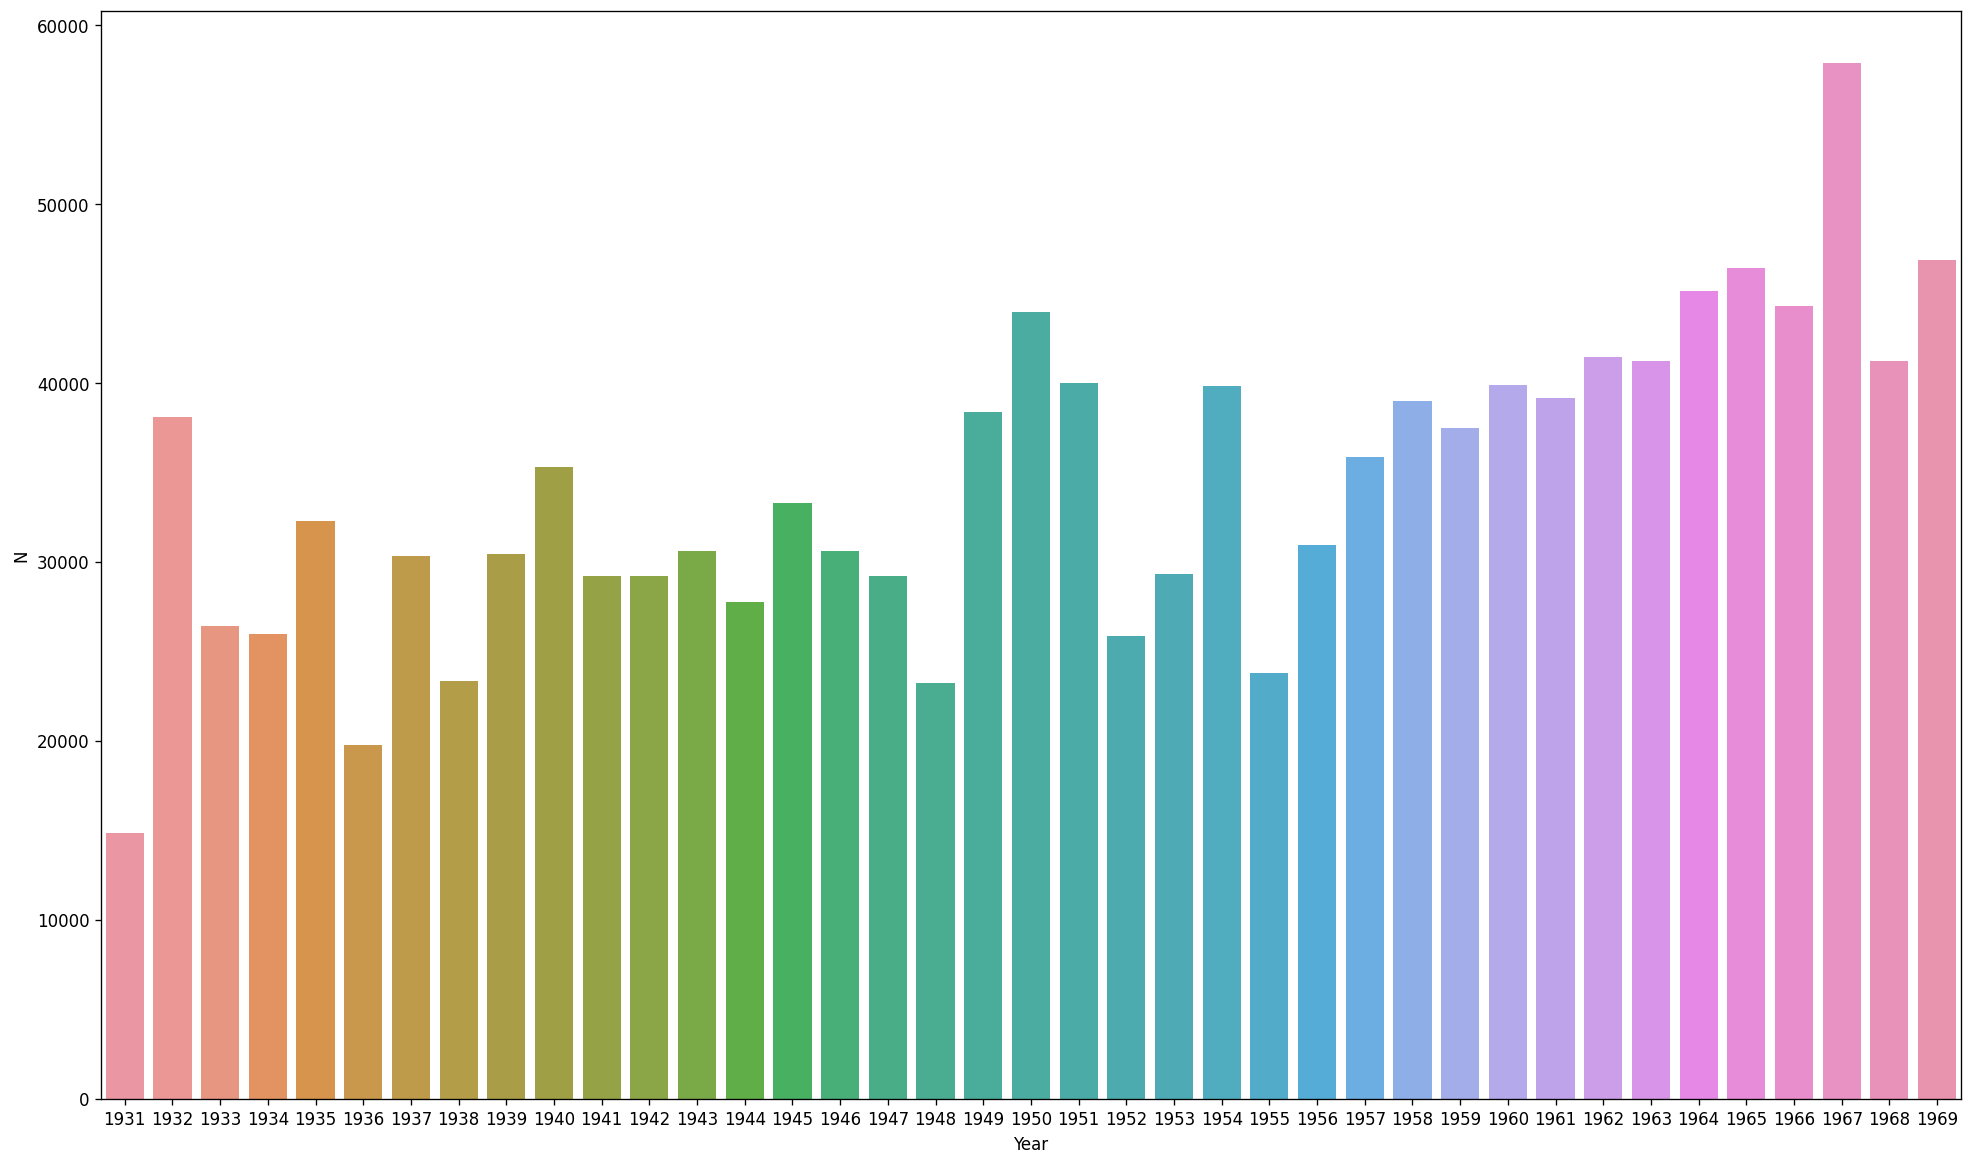

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20,12]
plt.rcParams['figure.dpi'] = 120

sns.barplot(x = counts.index, y = "N", data = counts)
print("Done!")

Now, because it takes awhile to fit the TF-IDf model, let's load one that is pre-trained. We first load the pre-trained version, and then we tell the *ai* object to use that version. There are two parts here: the vectorizer and a phrase model that uses PMI to find sequences like "New York."

In [8]:
ai_state = load("tf-idf.US.Congress.1931-2016")
ai.tfidf_vectorizer = ai_state.tfidf_vectorizer
ai.phrases = ai_state.phrases
print("Done!")

Done!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.23.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
year_df = df.loc[df["Year"] == 1955]
print(year_df)
ai.wordclouds(year_df, stage = 4, features = "tfidf")
print("Done!")

        Unnamed: 0  ...                                               Text
727426      761314  ...  Mr. President. I have a brief announcement to ...
727427      761315  ...  My colleagues. this shifting about that Speake...
727428      761316  ...  May I ask the gentleman at this time whether h...
727429      761317  ...  Mr. Speaker. your committee appointed on the p...
727430      761318  ...  Mr. Speaker. I have the sad duty of announcing...
...            ...  ...                                                ...
751202      785090  ...  Mr. Speaker. the 1st session of the 84th Congr...
751203      785091  ...  Committee of conference. S. 2126. An act to ex...
751204      785092  ...  Committee of conference. S. 1041. An act to am...
751205      785093  ...  House Office Building. Washington. D. C. DEAR ...
751206      785094  ...  Chairman of the Board. Columbia Broadcasting S...

[23781 rows x 5 columns]


TypeError: ignored

This will take a moment to calculate. Then, we'll see a wordcloud for congress in 1955. If you want to see a different year, change the part of the line where it says *1955*!

In [11]:
print(year_df)

        Unnamed: 0  ...                                               Text
727426      761314  ...  Mr. President. I have a brief announcement to ...
727427      761315  ...  My colleagues. this shifting about that Speake...
727428      761316  ...  May I ask the gentleman at this time whether h...
727429      761317  ...  Mr. Speaker. your committee appointed on the p...
727430      761318  ...  Mr. Speaker. I have the sad duty of announcing...
...            ...  ...                                                ...
751202      785090  ...  Mr. Speaker. the 1st session of the 84th Congr...
751203      785091  ...  Committee of conference. S. 2126. An act to ex...
751204      785092  ...  Committee of conference. S. 1041. An act to am...
751205      785093  ...  House Office Building. Washington. D. C. DEAR ...
751206      785094  ...  Chairman of the Board. Columbia Broadcasting S...

[23781 rows x 5 columns]


# Practice